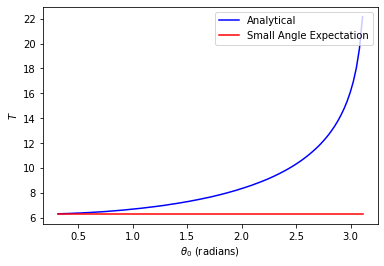

In [2]:
# Author: Bob Johnson robertjo@physics.upenn.edu

from numpy import array, arange, sin, pi, cos, sqrt, linspace
from pylab import plot, show, legend, xlabel, ylabel

# this program solves drdt = f(r,t)
def f(r,t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -g/l*sin(theta)
    return array([ftheta, fomega], float)

#parameters
m = 1.0                          # mass of pendulum bob
g = 1.0                          # gravitational acceleration
l = 1.0                          # length of pendulum
t0 = 0                           # initial time
tf = 50                          # final time
N = 10000                         # number of points
h = (tf - t0)/N                  # step size
tpoints = arange(t0, tf, h)      # time values
Tvals = []
Tsmall = []
theta0vals = linspace(0.1*pi, 0.99*pi, 100)

for theta0 in theta0vals:
    omega0 = 0
    r = array([theta0, omega0])
    thetaold = theta0
    c1 = 0
    c2 = 0
    for t in tpoints:
        #4th order Runge Kutta
        k1 = h*f(r, t)
        k2 = h*f(r + 0.5*k1, t + 0.5*h)
        k3 = h*f(r + 0.5*k2, t + 0.5*h)
        k4 = h*f(r + k3, t + h)
        r += 1/6*(k1 + 2*k2 + 2*k3 + k4)
        if c1 == 0 and r[0] < 0 and thetaold > 0: #set c1 on way down at theta = 0
            c1 = t
        elif c1 != 0 and c2 == 0 and r[0] < 0 and thetaold > 0: #set c2 on next way down at theta = 0
            c2 = t
            break
        thetaold = r[0]
    Tvals.append(c2 - c1)
    Tsmall.append(2*pi*sqrt(l/g))
# plot results
plot(theta0vals, Tvals, "b-", label="Analytical")
plot(theta0vals, Tsmall, "r-", label="Small Angle Expectation")
xlabel(r"$\theta_0$ (radians)")
ylabel("$T$")
legend(loc="upper right")
show()

Our analytical solution tells us that the higher up we drop the pendulum the longer it takes to swing one period of motion. Also we can see that as $\theta_0$ increases, the period of oscillation diverges from the small angle approximation, $2\pi\sqrt{\frac{l}{g}}$, which the graph tells us is truly a good approximation for our analytical solution for small $\theta_0 < 0.5 rad$. 